# Глава 17. 
## Машины опорных векторов
> <b>17.1 Тренировка линейного классификатора

In [1]:
# Загрузить библиотеки
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Загрузить данные всего с двумя классами и двумя признаками
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

# Стнадартизировать признаки
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Создать опорно-векторный классификатор
svc = LinearSVC(C=1.0)

# Натренировать модель
model = svc.fit(features_standardized, target)

*Определение стиля изображения*

In [3]:
# Заставить все графики в блокноте Jupyter
# в дальнейшем появляться локально 
%matplotlib inline

# переопределение стиля
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family']     = 'sans-serif'
rcParams['font.sans-serif'] = ['Ubuntu Condensed']
rcParams['figure.figsize']  = (4, 3)
rcParams['legend.fontsize'] = 10
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9

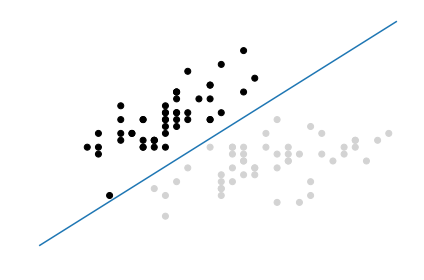

In [4]:
# Загрузить библиотеку
from matplotlib import pyplot as plt

# Вывести точки данных на график и расцветить,
# используя их класс
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Создать гиперплоскость
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Начертить гиперплоскость
plt.plot(xx, yy)
plt.axis("off")
plt.tight_layout()
plt.savefig('pics/17_01.png', dpi=600)
plt.show()

In [2]:
# Создать новое наблюдение
new_observation = [[ -2, 3]]

# Предсказать класс нового наблюдения
svc.predict(new_observation)

array([0])

> <b>17.2 Обработка линейно-неразделимых классов с помощью ядер

In [5]:
# Загрузить библиотеки
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Задать начальное значение рандомизации
np.random.seed(0)

# Сгенерировать два признака
features = np.random.randn(200, 2)

# Применить вентиль XOR (вам не обязательно знать, что это такое),
# чтобы сгенерировать линейно разделимые классы
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# Создать опорно-векторную машину 
# с радиально-базисным функциональным ядром (RBF-ядром)
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Натренировать классификатор
model = svc.fit(features, target)

In [6]:
# Вывести на график наблюдения и гиперплоскость границы решения
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker="+", label=cl)

In [7]:
# Создать опорно-векторный классификатор с линейным ядром
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# Натренировать модель
svc_linear.fit(features, target)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

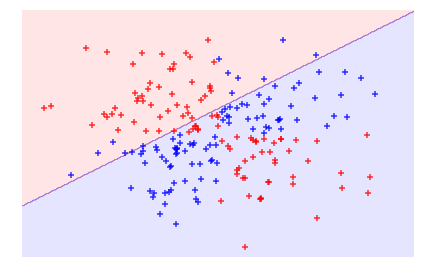

In [9]:
# Вывести на график наблюдения и гиперплоскость
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off")
plt.tight_layout()
plt.savefig('pics/17_02.png', dpi=600)
plt.show()

In [11]:
# Создать опорно-векторную машину 
# с радиально-базисным функциональным ядром (RBF-ядром)
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Натренировать классификатор
model = svc.fit(features, target)

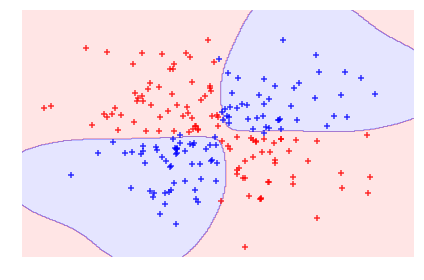

In [12]:
# Вывести на график наблюдения и гиперплоскость
plot_decision_regions(features, target, classifier=svc)
plt.axis("off")
plt.tight_layout()
plt.savefig('pics/17_03.png', dpi=600)
plt.show()

> <b>17.3 Создание предсказанных вероятностей

In [13]:
# Загрузить библиотеки
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Загрузить данные
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Стандартизировать признаки
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Создать объект опорно-векторного классификатора
svc = SVC(kernel="linear", probability=True, random_state=0)

# Натренировать классификатор
model = svc.fit(features_standardized, target)

# Создать наблюдение
new_observation = [[.4, .4, .4, .4]]

# Взглянуть на предсказанные вероятности
model.predict_proba(new_observation)

array([[0.00579881, 0.96697354, 0.02722765]])

> <b>17.4 Идентификация опорных векторов

In [14]:
# Загрузить библиотеки
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Загрузить данные только с двумя классами
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# Стандартизировать признаки
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Создать объект опорно-векторного классификатора
svc = SVC(kernel="linear", random_state=0)

# Натренировать классификатор
model = svc.fit(features_standardized, target)

# Взглянуть на опорные векторы
model.support_vectors_

array([[-0.5810659 ,  0.43490123, -0.80621461, -0.50581312],
       [-1.52079513, -1.67626978, -1.08374115, -0.8607697 ],
       [-0.89430898, -1.46515268,  0.30389157,  0.38157832],
       [-0.5810659 , -1.25403558,  0.09574666,  0.55905661]])

In [15]:
model.support_

array([23, 41, 57, 98])

In [16]:
model.n_support_

array([2, 2])

> <b>17.5 Обработка несбалансированных классов

In [17]:
# Загрузить библиотеки
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Загрузить данные только с двумя классами
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# Сделать класс сильно несбалансированным,
# удалив первые 40 наблюдений
features = features[40:,:]
target = target[40:]

# Создать вектор целей, указав класс 0 либо 1
target = np.where((target == 0), 0, 1)

# Стандартизировать признаки
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Создать опорно-векторный классификатор
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)

# Натренировать классификатор
model = svc.fit(features_standardized, target)